 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 04 : Neural Networks </b>


This programming assignment gives you a chance to perform the classification task using neural networks. You will get to build a neural network from scratch and train and test it on a standard classification dataset. Further you will learn different tricks and techniques to train a neural network eficiently by observing few important issues and trying to overcome them. This includes observing the performance of the network for different activation functions and optimization algorithms. We will conclude with implementation of various regularization techniques to overcome the problems of overfitting and vanishing gradients.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<b>  Part - (1) : Develop a neural network based classification network from scratch: </b>  This programming assignment uses MNIST digit dataset. It consists of large collection of handwritten digits from 0 to 9. These images are formated as 28x28 pixel gray scale images. The objective of this programming assignment is to design a neural network architecture that takes input as 28x28 image (or 784 dimensional vector) as input and predicts the digit information in it. Although there are diffrent varieties of neural network architecture to solve this task, this programming assignment uses only the feed forward network.  

<dt> <h6> 1. Load MNIST data and create train, test splits </dt> </h6>

<dd> <h6> - The MNIST dataset consists of around 70,000 images. Divide the dataset into two segments: training and testing. Allocate 60,000 images for training and 10,000 images for testing
</dd> </h6>
<dd> <h6> - Code for downloading the data and creating train-test splits is provided </dd> </h6>

<dt> <h6> 2. Design a simple classification network </dt> </h6>

<dd> <h6> - Let us use three layer feed-forward neral network. Use 512 nodes in the hidden layers and 10 nodes in the output layer. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dd> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dd> </h6>
<dd> <h6> where $\textbf{W}_{1} \in \mathcal{R}^{512 \times 768}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{10 \times 512} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dd> </h6>
<dd> <h6> - Consider g(.) as ReLU activation function. Softmax activation function should be used at the last layer h(.), to get the posterior probability of the classes. </dd> </h6>

<dt> <h6> - Training classification network: </dt> </h6>

<dd> <h6>  - Flatten the 28x28 images to arrive at 784 dimensional vector.  </dd> </h6>  
<dd> <h6> - Randomly initialize the parameters of network, $\textbf{W}_{1} \in \mathcal{R}^{768 \times 512}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{512 \times 10}$  </dd> </h6>
<dd> <h6> - Feedforward the batch of input vectors to get the posterior probability of classes.  </dd> </h6>
<dd> <h6> - Compute the loss between the estimated posterior probabilities and the true targets. </dd> </h6>  
<dd> <h6> - Update the parameters of network to minimize the loss function.  </dd> </h6>
<dd> <h6> <dd> <h6> - Backpropagate the loss function to get the gradients.  </dd> </h6> </dd> </h6>  

<dd> <h6> <dd> <h6> - You can use stochastic gradient descent (SGD) optimization algorithm to update the parameters.  </dd> </h6> </dd> </h6>  
<dd> <h6> <dd> <h6> - Cleverly set the hyperparameters involved in this optimization process. </dd> </h6> </dd> </h6>

<dt> <h6> 3. Evaluate the performance of classification network </dd> </h6>
<dd> <h6> - feed-forward the MNIST data through the trained classification network to get class posteriors. </dd> </h6>  
<dd> <h6> - Assign the input to the class having maximum posterior probability </dd> </h6>  
<dd> <h6> - Compute the loss and accuaracy </dd> </h6>  
<dd> <h6> - Report your observations </dd> </h6>  





In [6]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

Training data (60000, 28, 28)
Training labels (60000,)
Testing data (10000, 28, 28)
Testing labels (10000,)


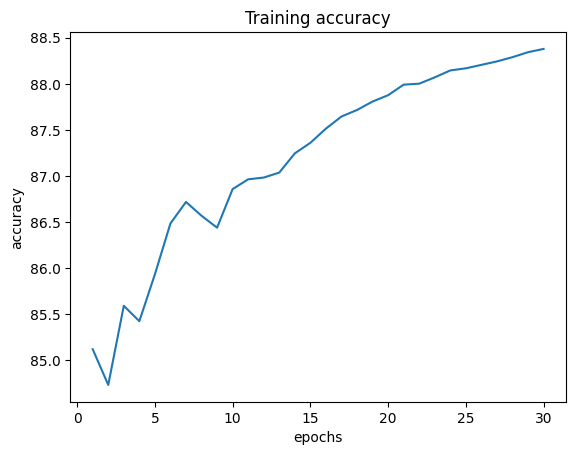

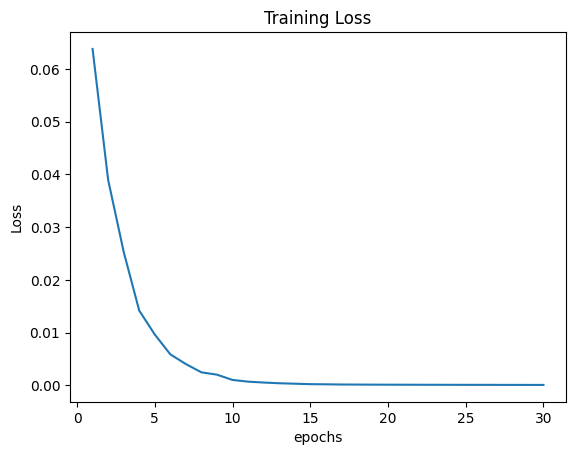

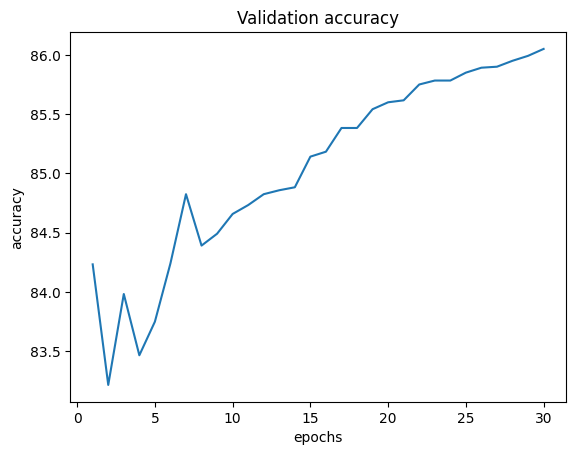

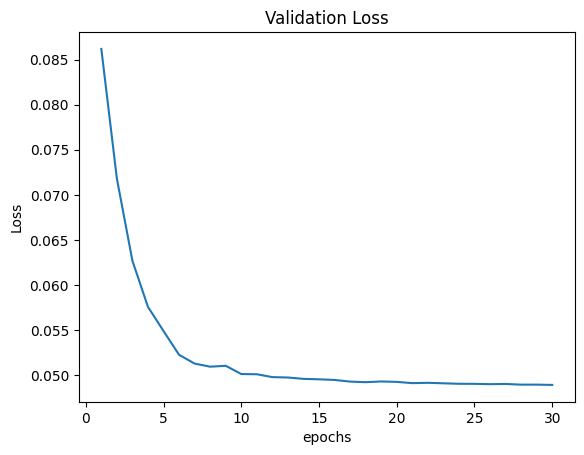

Accuracy on Testing data : 86.16
Loss on Testing data : 0.04922780809362322


In [ ]:
from typing import ValuesView
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections


##################################################
#Load MNIST data.
##################################################
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

#Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel.shape)


#Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel.shape)

##################################################
#Define the architecture
##################################################

#Complete the below function to impliment ReLU activation function
def ReLu(inp):
  outp = np.maximum(0, inp)

  return outp

#Complete the below function to impliment gradient of ReLU activation function
def gradReLu(inp):
  outp = np.zeros_like(inp)
  outp[inp > 0] = 1

  return outp

#Complete the below function to impliment softmax activation function
def softmax(inp):
  inp=np.array(inp)
  outp=[]
  for i in range(len(inp)):

    ma=np.max(inp[i])
    for j in range(len(inp[0])):
      inp[i][j]=inp[i][j]-ma

    out=[]
    sum0=0
    for j in range(len(inp[0])):
      a=np.exp(inp[i][j])
      sum0=sum0+np.exp(inp[i][j])

    for k in range(len(inp[0])):
      a=np.exp(inp[i][k])/sum0
      out.append(a)

    outp.append(out)

  outp=np.array(outp)
  return outp

#Complete the below function to impliment forward propagation of data
def fwdPropagate(inputs, weights):
  #Inputs: input data, paramters of network
  W1, W2, W3 = weights

  # First layer activation
  a1 = np.dot(inputs, W1)
  z1 = ReLu(a1)

  # Second layer activation
  a2 = np.dot(z1, W2)
  z2 = ReLu(a2)

  # Final layer activation
  a3 = np.dot(z2, W3)
  #z3 = ReLu(a3)
  outps=softmax(a3)

  #Return the requires outputs, i.e., final output and intermediate activations
  return outps,z1,z2


#Complete the below function to compute the gradients
def computeGradients(inputs, targets, weights, activations):
  #Inputs: input data, targets, parameters of netwrok, intermediate activations
  outps,z1,z2=activations
  W1, W2, W3 = weights

  #Compute the loss
  epsilon = 1e-7
  loss = -np.mean(targets * np.log(outps + epsilon))

  #Compote the derivative of loss at parameters
  dZ3=outps-targets
  dj_dw3=np.dot(z2.T,dZ3)*(1/len(inputs))

  dZ2 = np.dot(dZ3, W3.T) * gradReLu(z2)
  dj_dw2 = np.dot(z1.T, dZ2)*(1/len(inputs))

  dZ1 = np.dot(dZ2, W2.T) * gradReLu(z1)
  dj_dw1 = np.dot(inputs.T, dZ1)*(1/len(inputs))


  #Return the gradients
  return [dj_dw1, dj_dw2, dj_dw3]

#Complete the below function to update the parameters using the above computed gradients
def applyGradients(weights, gradients, learning_rate):
  #Inputs: weights, gradients, and learning rate
  W1, W2, W3 = weights
  dj_dw1, dj_dw2, dj_dw3 = gradients

  W1=W1-learning_rate*dj_dw1
  W2=W2-learning_rate*dj_dw2
  W3=W3-learning_rate*dj_dw3

  #Return the updated parameters
  return [W1, W2, W3]

#Complete the below function to complete the backpropagation ste
def backPropagate(inputs, targets, weights, activations, learning_rate):
  #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm

  #Compute the gradients
  g1,g2,g3=computeGradients(inputs, targets, weights, activations)

  #Update the paramters using gradients
  weights=applyGradients(weights, [g1,g2,g3], learning_rate)

  #Return the updated parameters
  return weights

##################################################
#Train the network
##################################################

#Complete the below function to complete the training of network
def training(inputs, targets_idx, batch_size = 128, epochs=30, train_val_split=0.8, learning_rate=0.001):

  #Set the hyperparameters
  hidden_units =512
  n_classes =10
  n_samples =len(inputs)
  n_batches =n_samples/batch_size

  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data
  index = int(train_val_split * n_samples)
  train_input, val_input = inputs[:index], inputs[index:]
  train_target, val_target = targets_idx[:index], targets_idx[index:]

  n_samples =len(train_input)
  n_batches =int(n_samples/batch_size)

  #Randomly initialize the weights
  W1=(np.random.rand(784,512)*2-1)*0.1
  W2=(np.random.rand(512, 512)*2-1)*0.1
  W3=(np.random.rand(512, 10)*2-1)*0.1

  weights=[W1,W2,W3]

  Train_loss=[]
  Val_loss=[]
  Train_acc=[]
  Val_acc=[]


  #Interate for epochs times
  for epoch in range(epochs):
    #Shuffle the training data
    per = np.random.permutation(len(train_input))
    train_input_shuffle = train_input[per]
    train_target_shuffle= train_target[per]

    #Interate through the batches of data
    for batch in range(n_batches):
      #Get the batch of data
      start=batch*batch_size
      end=(batch+1)*batch_size

      train_batch=train_input_shuffle[start:end]
      target_batch=train_target_shuffle[start:end]

      #Forward propagation
      activations = fwdPropagate(train_batch, weights)

      #Backward propagation
      weights = backPropagate(train_batch, target_batch, weights, activations, learning_rate)


    #Compute outpus on trianing data
    train_output,z1,z2 = fwdPropagate(train_input, weights)

    #Compute training accuracy, and training error
    count=0

    for i in range(len(train_output)):
      one_index = np.argmax(train_target[i] == 1)
      value_index=train_output[i][one_index]
      if (1-value_index)<0.0001:
        count=count+1

    train_acc=count/len(train_output)
    Train_acc.append(train_acc)

    epsilon = 1e-7
    train_loss = -np.mean(train_target * np.log(train_output + epsilon))
    Train_loss.append(train_loss)

    #Compute outputs on validation data
    val_output,z1,z2 = fwdPropagate(val_input, weights)

    #Compute validation accuracy, and validation error
    count=0
    for i in range(len(val_output)):
      one_index = np.argmax(val_target[i] == 1)
      value_index=val_output[i][one_index]
      if (1-value_index)<0.0001:
        count=count+1

    val_acc=count/len(val_output)
    Val_acc.append(val_acc)

    epsilon = 1e-7
    val_loss = -np.mean(val_target * np.log(val_output + epsilon))
    Val_loss.append(val_loss)

  #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
  Train_loss=np.array(Train_loss)
  Val_loss=np.array(Val_loss)
  Train_acc=np.array(Train_acc)
  Val_acc=np.array(Val_acc)

  x=[i for i in range(1,len(Train_acc)+1)]

  plt.plot(x,Train_acc*100)
  plt.title("Training accuracy")
  plt.xlabel("epochs")
  plt.ylabel("accuracy")
  plt.show()

  plt.plot(x,Train_loss)
  plt.title("Training Loss")
  plt.xlabel("epochs")
  plt.ylabel("Loss")
  plt.show()

  plt.plot(x,Val_acc*100)
  plt.title("Validation accuracy")
  plt.xlabel("epochs")
  plt.ylabel("accuracy")
  plt.show()

  plt.plot(x,Val_loss)
  plt.title("Validation Loss")
  plt.xlabel("epochs")
  plt.ylabel("Loss")
  plt.show()

  return weights


#Call the training function to train the network

trainset_flat = mnist_traindata.reshape(mnist_traindata.shape[0], -1)

#training label
train_label=[]
for i in range(len(mnist_trainlabel)):
  a=[0,0,0,0,0,0,0,0,0,0]
  a[mnist_trainlabel[i]]=1
  train_label.append(a)
train_label=np.array(train_label)

weights=training(trainset_flat, train_label, batch_size = 128, epochs=30, train_val_split=0.8, learning_rate=0.001)

#################################################
#Evaluate the performance on test data
##################################################
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()

test_flat=mnist_testdata.reshape(mnist_testdata.shape[0], -1)

test_output,z1,z2 = fwdPropagate(test_flat, weights)

#testing label
test_label=[]
for i in range(len(mnist_testlabel)):
  a=[0,0,0,0,0,0,0,0,0,0]
  a[mnist_testlabel[i]]=1
  test_label.append(a)
test_label=np.array(test_label)


count=0

for i in range(len(test_output)):
  one_index = np.argmax(test_label[i] == 1)
  value_index=test_output[i][one_index]
  if (1-value_index)<0.0001:
    count=count+1

test_acc=count/len(test_output)

epsilon = 1e-7
test_loss = -np.mean(test_label * np.log(test_output + epsilon))

print("Accuracy on Testing data :",test_acc*100)
print("Loss on Testing data :",test_loss)



<b> Report your observations </b>

1.On increasing the epoch the loss is decreasing.

2.On increasing the epoch accuracy of the model is increasing.

3.The accuracy of test is less than the accuracy of training.



<b> Part - (2) : Understanding activation functions: </b> In this part you will learn to use different activation functions for the classification task and compare their performances.

<dt> <h6> 1. Train MNIST digit classification network with different activation functions i.e. Sigmoid, Tanh, ReLU, LeakyReLU etc. You can stick to stochastic gradient descent optimization algorithm for this part </dt> </h6>
<dt> <h6> 2. Report the accuray on MNIST test data for all the experiments. Write down your observations in the report.</br> </dt> </h6>



In [19]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
#import collectionss1

#Load MNIST data.
##################################################
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

#Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()


#Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()

trainset_flat = mnist_traindata.reshape(mnist_traindata.shape[0], -1)
#normalize
mean_vals = np.mean(trainset_flat, axis=0)
std_vals = np.std(trainset_flat, axis=0)
epsilon = 1e-8
trainset_flat = (trainset_flat - mean_vals) / (std_vals+epsilon)

#training label
train_label=[]
for i in range(len(mnist_trainlabel)):
  a=[0,0,0,0,0,0,0,0,0,0]
  a[mnist_trainlabel[i]]=1
  train_label.append(a)
train_label=np.array(train_label)


test_flat=mnist_testdata.reshape(mnist_testdata.shape[0], -1)
mean_vals = np.mean(test_flat, axis=0)
std_vals = np.std(test_flat, axis=0)
epsilon = 1e-8
test_flat = (test_flat - mean_vals) / (std_vals+epsilon)

#testing label
test_label=[]
for i in range(len(mnist_testlabel)):
  a=[0,0,0,0,0,0,0,0,0,0]
  a[mnist_testlabel[i]]=1
  test_label.append(a)
test_label=np.array(test_label)

##################################################
#Train the network with different activation functions
##################################################
def softmax(inp):
  inp=np.array(inp)
  outp=[]
  for i in range(len(inp)):

    ma=np.max(inp[i])
    for j in range(len(inp[0])):
      inp[i][j]=inp[i][j]-ma

    out=[]
    sum0=0
    for j in range(len(inp[0])):
      a=np.exp(inp[i][j])
      sum0=sum0+np.exp(inp[i][j])

    for k in range(len(inp[0])):
      a=np.exp(inp[i][k])/sum0
      out.append(a)

    outp.append(out)

  outp=np.array(outp)
  return outp


def ReLu(inp):
  outp = np.maximum(0, inp)

  return outp

#Complete the below function to impliment gradient of ReLU activation function
def gradReLu(inp):
  outp = np.zeros_like(inp)
  outp[inp > 0] = 1

  return outp

def sigmoid_fun(inp):
  outp = np.zeros_like(inp)
  idx = inp > 0
  outp[idx] = 1 / (1 + np.exp(-inp[idx]))
  outp[~idx] = np.exp(inp[~idx]) / (1 + np.exp(inp[~idx]))
  return outp

def grad_sigmoid_fun(inp):
  return sigmoid_fun(inp) * (1 - sigmoid_fun(inp))

def tanh_fun(inp):
  return np.tanh(inp)

def grad_tanh_fun(inp):
  return 1-np.tanh(inp)**2

def leakyReLu_fun(inp,alpha=0.01):
  return np.maximum(alpha * inp, inp)

def grad_leakyReLu_fun(inp,alpha=0.01):
  grad = np.ones_like(inp)
  grad[inp < 0] = alpha
  return grad

def fwdPropagate_new(inputs, weights,k):
  #Inputs: input data, paramters of network
  W1, W2, W3 = weights

  if k==1:
    # First layer activation
    a1 = np.dot(inputs, W1)
    z1 = ReLu(a1)

    # Second layer activation
    a2 = np.dot(z1, W2)
    z2 = ReLu(a2)

    # Final layer activation
    a3 = np.dot(z2, W3)
    outps=softmax(a3)

  elif k==2:
    # First layer activation
    a1 = np.dot(inputs, W1)
    z1 = sigmoid_fun(a1)

    # Second layer activation
    a2 = np.dot(z1, W2)
    z2 = sigmoid_fun(a2)

    # Final layer activation
    a3 = np.dot(z2, W3)
    outps=softmax(a3)

  elif k==3:
    # First layer activation
    a1 = np.dot(inputs, W1)
    z1 = tanh_fun(a1)

    # Second layer activation
    a2 = np.dot(z1, W2)
    z2 = tanh_fun(a2)

    # Final layer activation
    a3 = np.dot(z2, W3)
    outps=softmax(a3)

  elif k==4:
    # First layer activation
    a1 = np.dot(inputs, W1)
    z1 = leakyReLu_fun(a1)

    # Second layer activation
    a2 = np.dot(z1, W2)
    z2 = leakyReLu_fun(a2)

    # Final layer activation
    a3 = np.dot(z2, W3)
    outps=softmax(a3)

  #Return the requires outputs, i.e., final output and intermediate activations
  return outps,z1,z2

#Complete the below function to compute the gradients
def computeGradients_new(inputs, targets, weights, activations,k):
  #Inputs: input data, targets, parameters of netwrok, intermediate activations
  outps,z1,z2=activations
  W1, W2, W3 = weights

  #Compute the loss
  epsilon = 1e-7
  loss = -np.mean(targets * np.log(outps + epsilon))

  #Compote the derivative of loss at parameters
  if k==1:
    dZ3=outps-targets
    dj_dw3=np.dot(z2.T,dZ3)*(1/len(inputs))

    dZ2 = np.dot(dZ3, W3.T) * gradReLu(z2)
    dj_dw2 = np.dot(z1.T, dZ2)*(1/len(inputs))

    dZ1 = np.dot(dZ2, W2.T) * gradReLu(z1)
    dj_dw1 = np.dot(inputs.T, dZ1)*(1/len(inputs))

  elif k==2:
    dZ3=outps-targets
    dj_dw3=np.dot(z2.T,dZ3)*(1/len(inputs))

    dZ2 = np.dot(dZ3, W3.T) * grad_sigmoid_fun(z2)
    dj_dw2 = np.dot(z1.T, dZ2)*(1/len(inputs))

    dZ1 = np.dot(dZ2, W2.T) * grad_sigmoid_fun(z1)
    dj_dw1 = np.dot(inputs.T, dZ1)*(1/len(inputs))

  elif k==3:
    dZ3=outps-targets
    dj_dw3=np.dot(z2.T,dZ3)*(1/len(inputs))

    dZ2 = np.dot(dZ3, W3.T) * grad_tanh_fun(z2)
    dj_dw2 = np.dot(z1.T, dZ2)*(1/len(inputs))

    dZ1 = np.dot(dZ2, W2.T) * grad_tanh_fun(z1)
    dj_dw1 = np.dot(inputs.T, dZ1)*(1/len(inputs))

  else:
    dZ3=outps-targets
    dj_dw3=np.dot(z2.T,dZ3)*(1/len(inputs))

    dZ2 = np.dot(dZ3, W3.T) * grad_leakyReLu_fun(z2)
    dj_dw2 = np.dot(z1.T, dZ2)*(1/len(inputs))

    dZ1 = np.dot(dZ2, W2.T) * grad_leakyReLu_fun(z1)
    dj_dw1 = np.dot(inputs.T, dZ1)*(1/len(inputs))


  #Return the gradients
  return [dj_dw1, dj_dw2, dj_dw3]

#Complete the below function to update the parameters using the above computed gradients
def applyGradients_new(weights, gradients, learning_rate,k):
  #Inputs: weights, gradients, and learning rate
  W1, W2, W3 = weights
  dj_dw1, dj_dw2, dj_dw3 = gradients

  W1=W1-learning_rate*dj_dw1
  W2=W2-learning_rate*dj_dw2
  W3=W3-learning_rate*dj_dw3

  #Return the updated parameters
  return [W1, W2, W3]

#Complete the below function to complete the backpropagation ste
def backPropagate_new(inputs, targets, weights, activations, learning_rate,k):
  #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm

  #Compute the gradients
  g1,g2,g3=computeGradients_new(inputs, targets, weights, activations,k)

  #Update the paramters using gradients
  weights=applyGradients_new(weights, [g1,g2,g3], learning_rate,k)

  #Return the updated parameters
  return weights


def training_fun(inputs, targets_idx, batch_size = 4800, epochs=15, train_val_split=0.8, learning_rate=0.001,k=1):

  #Set the hyperparameters
  hidden_units =512
  n_classes =10
  n_samples=len(inputs)

  index = int(train_val_split * n_samples)
  train_input, val_input = inputs[:index], inputs[index:]
  train_target, val_target = targets_idx[:index], targets_idx[index:]

  n_samples =len(train_input)
  n_batches =int(n_samples/batch_size)

  #Randomly initialize the weights
  W1=(np.random.rand(784,512)*2-1)*0.1
  W2=(np.random.rand(512, 512)*2-1)*0.1
  W3=(np.random.rand(512, 10)*2-1)*0.1

  weights=[W1,W2,W3]

  Train_acc=[]
  Train_loss=[]

  Val_acc=[]
  Val_loss=[]

  #Interate for epochs times
  for epoch in range(epochs):
    #Shuffle the training data
    per = np.random.permutation(len(train_input))
    train_input_shuffle = train_input[per]
    train_target_shuffle= train_target[per]

    #Interate through the batches of data
    for batch in range(n_batches):
      #Get the batch of data
      start=batch*batch_size
      end=(batch+1)*batch_size

      train_batch=train_input_shuffle[start:end]
      target_batch=train_target_shuffle[start:end]

      #Forward propagation
      activations = fwdPropagate_new(train_batch, weights,k)

      #Backward propagation
      weights = backPropagate_new(train_batch, target_batch, weights, activations, learning_rate,k)

    #Compute outpus on trianing data
    train_output,z1,z2 = fwdPropagate_new(train_input, weights,k)

    #Compute training accuracy, and training error
    count=0

    for i in range(len(train_output)):
      one_index = np.argmax(train_target[i] == 1)
      value_index=train_output[i][one_index]
      if (1-value_index)<0.0001:
        count=count+1

    train_acc=count/len(train_output)
    Train_acc.append(train_acc)

    epsilon = 1e-7
    train_loss = -np.mean(train_target * np.log(train_output + epsilon))
    Train_loss.append(train_loss)

    #Compute outputs on validation data
    val_output,z1,z2 = fwdPropagate_new(val_input, weights,k)

    #Compute validation accuracy, and validation error
    count=0
    for i in range(len(val_output)):
      one_index = np.argmax(val_target[i] == 1)
      value_index=val_output[i][one_index]
      if (1-value_index)<0.0001:
        count=count+1

    val_acc=count/len(val_output)
    Val_acc.append(val_acc)

    epsilon = 1e-7
    val_loss = -np.mean(val_target * np.log(val_output + epsilon))
    Val_loss.append(val_loss)



  return weights,Train_loss,Val_loss,Train_acc,Val_acc
##################################################
#Evaluate the performance on MNIST test data
##################################################


#a
weights,Tr_loss,Va_loss,Tr_acc,Va_acc=training_fun(trainset_flat, train_label, batch_size = 4800, epochs=15, train_val_split=0.8, learning_rate=0.01,k=1)

test_output1,z1,z2 = fwdPropagate_new(test_flat, weights,k=1)
count=0
for i in range(len(test_output1)):
  one_index = np.argmax(test_label[i] == 1)
  value_index=np.argmax(test_output1[i])
  if one_index==value_index:
    count=count+1
test_acc1=count/len(test_output1)
epsilon = 1e-7
test_loss = -np.mean(test_label * np.log(test_output1 + epsilon))
print("Accuracy on Testing data (ReLu):",test_acc1)
print("Loss on Testing data (ReLu):",test_loss)

best_k=1
best_val=test_acc1
best_loss=test_loss

weights,Tr_loss,Va_loss,Tr_acc,Va_acc=training_fun(trainset_flat, train_label, batch_size = 4800, epochs=15, train_val_split=0.8, learning_rate=0.01,k=2)

test_output2,z1,z2 = fwdPropagate_new(test_flat, weights,k=2)
count=0
for i in range(len(test_output2)):
  one_index = np.argmax(test_label[i] == 1)
  value_index=np.argmax(test_output2[i])
  if one_index==value_index:
    count=count+1
test_acc2=count/len(test_output2)
epsilon = 1e-7
test_loss = -np.mean(test_label * np.log(test_output2 + epsilon))
print("Accuracy on Testing data (sigmoid):",test_acc2)
print("Loss on Testing data (Sigmoid):",test_loss)

if (test_acc2>best_val):
  best_k=2
  best_val=test_acc2
  best_loss=test_loss

weights,Tr_loss,Va_loss,Tr_acc,Va_acc=training_fun(trainset_flat, train_label, batch_size = 4800, epochs=15, train_val_split=0.8, learning_rate=0.01,k=3)

test_output3,z1,z2 = fwdPropagate_new(test_flat, weights,k=3)
count=0
for i in range(len(test_output3)):
  one_index = np.argmax(test_label[i] == 1)
  value_index=np.argmax(test_output3[i])
  if one_index==value_index:
    count=count+1
test_acc3=count/len(test_output3)
epsilon = 1e-7
test_loss = -np.mean(test_label * np.log(test_output3 + epsilon))
print("Accuracy on Testing data (tanh):",test_acc3)
print("Loss on Testing data (tanh):",test_loss)

if (test_acc3>best_val):
  best_k=3
  best_val=test_acc3
  best_loss=test_loss

weights,Tr_loss,Va_loss,Tr_acc,Va_acc=training_fun(trainset_flat, train_label, batch_size = 4800, epochs=15, train_val_split=0.8, learning_rate=0.01,k=4)

test_output4,z1,z2 = fwdPropagate_new(test_flat, weights,k=4)
count=0
for i in range(len(test_output4)):
  one_index = np.argmax(test_label[i] == 1)
  value_index=np.argmax(test_output4[i])
  if one_index==value_index:
    count=count+1
test_acc4=count/len(test_output4)
epsilon = 1e-7
test_loss = -np.mean(test_label * np.log(test_output4 + epsilon))
print("Accuracy on Testing data (LeakyRelu):",test_acc4)
print("Loss on Testing data (LeakyRelu):",test_loss)

if (test_acc4>best_val):
  best_k=4
  best_val=test_acc4
  best_loss=test_loss


print("Best k :",best_k)
print("Best accuracy :",best_val)
print("Best loss :",best_loss)

Accuracy on Testing data (ReLu): 0.8551
Loss on Testing data (ReLu): 0.05517878285265623
Accuracy on Testing data (sigmoid): 0.5077
Loss on Testing data (Sigmoid): 0.2100843368772026
Accuracy on Testing data (tanh): 0.8531
Loss on Testing data (tanh): 0.05248534355464808
Accuracy on Testing data (LeakyRelu): 0.8605
Loss on Testing data (LeakyRelu): 0.05446516481079444
Best k : 4
Best accuracy : 0.8605
Best loss : 0.05446516481079444


<b> Report your observations </b>

I created 4 functions 1.ReLu
2.sigmoid
3.tanh
4.Leaky ReLu

I modified the training function to take input k,k represent the activation function

best activation function is LeakyReLu



<b> Part - (3) : Understanding optimization algorithms: </b> In this part you will learn to use different optimiztion algorithm apart from SGD.

<dt> <h6> 1. Using the best activation function from Part - (2), train the classification network using Adam optimization algorithm. </dt> </h6>
<dt> <h6> 3. Compare the accuracy of the networks trained with SGD and Adam optimization algorithms. </dt> </h6>
<dt> <h6> 4. Report your observations. </dt> </h6>

In [23]:
##################################################
#Train the network using Adam optimizer
##################################################

def adam_optimizer(input,targets,alpha=0.001,beta1=0.9,beta2=0.999,epsilon=1e-8,epoch=30,k=1):

  W1=(np.random.rand(784,512)*2-1)*0.1
  W2=(np.random.rand(512, 512)*2-1)*0.1
  W3=(np.random.rand(512, 10)*2-1)*0.1



  m1=np.zeros_like(W1)
  v1=np.zeros_like(W1)

  m2=np.zeros_like(W2)
  v2=np.zeros_like(W2)

  m3=np.zeros_like(W3)
  v3=np.zeros_like(W3)
  t=1

  weights=[W1,W2,W3]

  for i in range(epoch):


    activations=fwdPropagate_new(input, weights,k)

    grad=computeGradients_new(input, targets, weights, activations,k)

    g1,g2,g3=grad

    m1=beta1*m1 + (1-beta1)*g1
    v1=beta2*v1 + (1-beta2)*g1*g1
    m_corrected=m1/(1-beta1**t)
    v_corrected=v1/(1-beta2**t)

    W1=W1-alpha*m_corrected/np.sqrt(v_corrected + epsilon)

    m2=beta1*m2 + (1-beta1)*g2
    v2=beta2*v2 + (1-beta2)*g2*g2
    m_corrected=m2/(1-beta1**t)
    v_corrected=v2/(1-beta2**t)

    W2=W2-alpha*m_corrected/np.sqrt(v_corrected + epsilon)

    m3=beta1*m3 + (1-beta1)*g3
    v3=beta2*v3 + (1-beta2)*g3*g3
    m_corrected=m3/(1-beta1**t)
    v_corrected=v3/(1-beta2**t)

    W3=W3-alpha*m_corrected/np.sqrt(v_corrected + epsilon)
    weights=[W1,W2,W3]


    t=t+1
  return weights

k=best_k
weights=adam_optimizer(trainset_flat,train_label,alpha=0.001,beta1=0.9,beta2=0.999,epsilon=1e-8,epoch=30,k=k)

test_output,z1,z2 = fwdPropagate_new(test_flat, weights,best_k)

count=0
for i in range(len(test_output)):
  one_index = np.argmax(test_label[i] == 1)
  value_index=np.argmax(test_output[i])
  if one_index==value_index:
    count=count+1

test_acc_adam=count/len(test_output)
epsilon = 1e-7
test_loss_adam = -np.mean(test_label * np.log(test_output + epsilon))

print("Accuracy on Testing data using adam using LeakyRelu:",test_acc_adam)
print("Loss on Testing data using adam using LeakyRelu :",test_loss_adam)



##################################################
#Compare the accuracies and report your observations
##################################################

if test_acc_adam>best_val:
  print("Accuracy of adam is better than sgd")

else:
  print("Accuracy of sgd is better than adam")




Accuracy on Testing data using adam using LeakyRelu: 0.9383
Loss on Testing data using adam using LeakyRelu : 0.021626426256132376
Accuracy of adam is better than sgd


<b> Report your observations </b>

1.Accuracy of adam algothrim is better than the sgd

2.accuracy is approx 93%


<b> Part - (4) : Understanding regularization methods: </b> In this part of the assignment, you will learn about a few regularization techniques to reduce the overfitting problem. Using the above built network, include the following techniques to reduce the overfitting by retraining the network efficiently. Write down the accuracies for each case.
<dt> <h6> 1. Weight regularization: Add regularization term to the classification los </dt> </h6>
<dt> <h6> 2. Dropout with a probability of 0.2: Randomly drop the activation potentials of hidden neural with 0.2 probability. Disable the dropout layer in inference model. You can experiment with different dropout probabilities and report your observations.  </dt> </h6>
<dt> <h6> 3. Early stopping: Stop the network training when it is started to overfitting to training data. </dt> </h6>


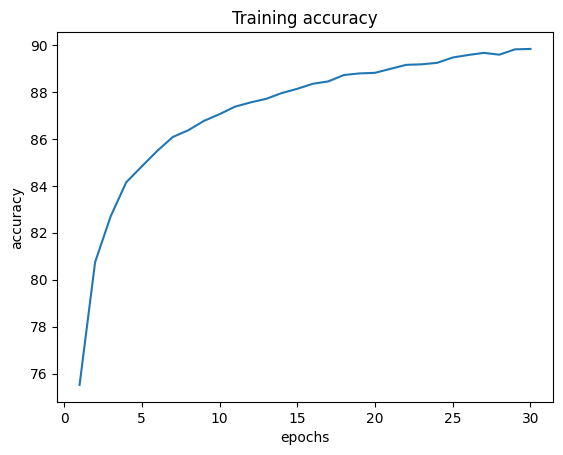

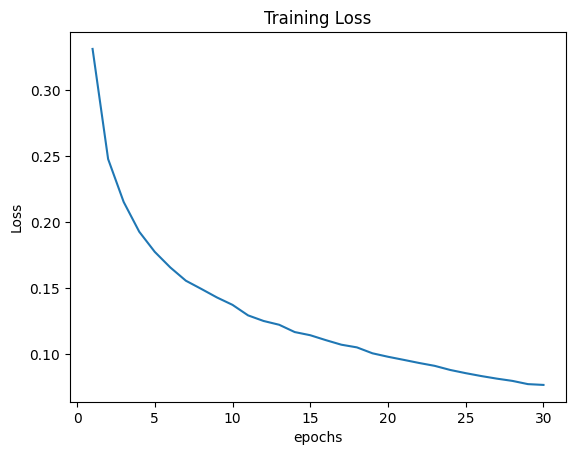

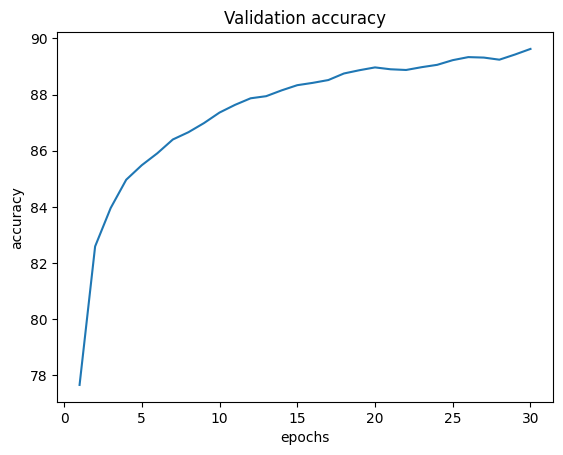

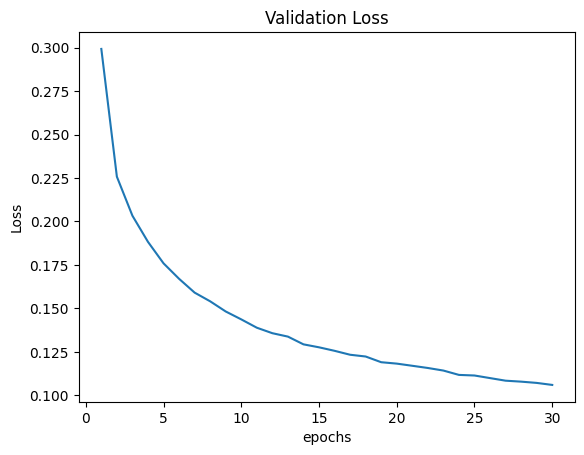

In [ ]:
##################################################
#Training with weight regularization
##################################################








##################################################
#Training with dropout strategy
##################################################
p=0.2


def training_fun_new(inputs, targets_idx, batch_size = 4800, epochs=30, train_val_split=0.8, learning_rate=0.001,p=0.2):

  #Set the hyperparameters
  hidden_units =512
  n_classes =10
  n_samples=len(inputs)

  index = int(train_val_split * n_samples)
  train_input, val_input = inputs[:index], inputs[index:]
  train_target, val_target = targets_idx[:index], targets_idx[index:]

  n_samples =len(train_input)
  n_batches =int(n_samples/batch_size)

  #Randomly initialize the weights
  W1=(np.random.rand(784,512)*2-1)*0.1
  W2=(np.random.rand(512, 512)*2-1)*0.1
  W3=(np.random.rand(512, 10)*2-1)*0.1

  weights=[W1,W2,W3]

  node=int(p*hidden_units)

  rows_to_remove = np.random.choice(hidden_units, node, replace=False)

  W1= np.delete(W1.T, rows_to_remove, axis=0)
  W1=W1.T

  W2= np.delete(W2, rows_to_remove, axis=0)

  rows_to_remove = np.random.choice(hidden_units, node, replace=False)

  W2= np.delete(W2.T, rows_to_remove, axis=0)
  W2=W2.T

  W3= np.delete(W3, rows_to_remove, axis=0)


  Train_loss=[]
  Val_loss=[]
  Train_acc=[]
  Val_acc=[]

  #Interate for epochs times
  for epoch in range(epochs):
    #Shuffle the training data
    per = np.random.permutation(len(train_input))
    train_input_shuffle = train_input[per]
    train_target_shuffle= train_target[per]

    #Interate through the batches of data
    for batch in range(n_batches):
      #Get the batch of data
      start=batch*batch_size
      end=(batch+1)*batch_size

      train_batch=train_input_shuffle[start:end]
      target_batch=train_target_shuffle[start:end]

      #Forward propagation
      activations = fwdPropagate_new(train_batch, weights,k)

      #Backward propagation
      weights = backPropagate_new(train_batch, target_batch, weights, activations, learning_rate,k)

    #Compute outpus on trianing data
    train_output,z1,z2 = fwdPropagate(train_input, weights)

    #Compute training accuracy, and training error
    count=0

    for i in range(len(train_output)):
      one_index = np.argmax(train_target[i] == 1)
      value_index=train_output[i][one_index]
      if (1-value_index)<0.0001:
        count=count+1

    train_acc=count/len(train_output)
    Train_acc.append(train_acc)

    epsilon = 1e-7
    train_loss = -np.mean(train_target * np.log(train_output + epsilon))
    Train_loss.append(train_loss)

    #Compute outputs on validation data
    val_output,z1,z2 = fwdPropagate(val_input, weights)

    #Compute validation accuracy, and validation error
    count=0
    for i in range(len(val_output)):
      one_index = np.argmax(val_target[i] == 1)
      value_index=val_output[i][one_index]
      if (1-value_index)<0.0001:
        count=count+1

    val_acc=count/len(val_output)
    Val_acc.append(val_acc)

    epsilon = 1e-7
    val_loss = -np.mean(val_target * np.log(val_output + epsilon))
    Val_loss.append(val_loss)

  #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
  Train_loss=np.array(Train_loss)
  Val_loss=np.array(Val_loss)
  Train_acc=np.array(Train_acc)
  Val_acc=np.array(Val_acc)

  x=[i for i in range(1,len(Train_acc)+1)]

  plt.plot(x,Train_acc*100)
  plt.title("Training accuracy")
  plt.xlabel("epochs")
  plt.ylabel("accuracy")
  plt.show()

  plt.plot(x,Train_loss)
  plt.title("Training Loss")
  plt.xlabel("epochs")
  plt.ylabel("Loss")
  plt.show()

  plt.plot(x,Val_acc*100)
  plt.title("Validation accuracy")
  plt.xlabel("epochs")
  plt.ylabel("accuracy")
  plt.show()

  plt.plot(x,Val_loss)
  plt.title("Validation Loss")
  plt.xlabel("epochs")
  plt.ylabel("Loss")
  plt.show()



  return weights



weights=training_fun_new(trainset_flat, train_label, batch_size = 4800, epochs=30, train_val_split=0.8, learning_rate=0.001,p=0.2)

##################################################
#Training with early stopping criterion
##################################################









<b> Report your observations </b>

1.accuracy is increasing with increasing epoch

2.loss is decreasing with increasing with epoch

3.there is less up and down in graph as compared with one question graph



<b> Part - (5) : Comparision with linear classifiers: </b> In this part of the assignment, you will compare the performance of deep neural network based classification models with the linear classification models. You will be provided with codes to generate two types of binary classification data. First type of data is linearly separabble. The second type of data is not linearly separable. You have to classify these two types of data bases using both deep neural network models and linear classification models.

<dt> <h6> 1. Linearly separable data: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 3  \\ 3  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 4500 samples per class for training and 500 samples for testing.
</dt> </h6>
<dt> <h6> 2. Non-linearly separable data: Given code generates binary classification data that is not linearly separable. Each class has around 5000 data points. Class1 data is denoted with the variable "class1_data". Class2 data is denoted with the variable "class2_data". Use 90% of data for training and 10 % for testing.    </dt> </h6>

<dt> <h6> <b> Programming questions: </b> </dt> </h6>

<dt> <h6> 3. Linear classification models - logistic regression ( Iterative reweighted least squares approach ): logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. Given the training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data X_test. </dt> </h6>
<dd> <h6> a). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.
</dd> </h6>
<dd> <h6> b). Evaluate the classification performance, i.e., compute the accuracy on the test data. </dd> </h6>
<dd> <h6> c). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different. </dd> </h6>

<dt> <h6> 4. Deep neural network based classification models: Let us cosider feed-forward neural network with three layers. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dt> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dt> </h6>

<dd> <h6> - where $\textbf{W}_{1} \in \mathcal{R}^{3 \times 2}$,$\textbf{W}_{2} \in \mathcal{R}^{3 \times 3}$,$\textbf{W}_{3} \in \mathcal{R}^{1 \times 3} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dt> </h6>

<dd> <h6> - Consider g(.) as ReLU activation function. Sigmoid activation function should be used at the last layer h(.), to get the posterior probability of the class1. Class2 posterior probability can obtained by (1 - class1 posterior probability). </dt> </h6>
<dd> <h6> - Train the binary classification network using the given training data. Plot second layer activation potentials, i.e., feed-forward the entire data to obtain the 3 dimensional activation potentials at second layer. Plot them and observe how they distribute in the 3-dimensional space compared to the original 2-dimensional space. </dt> </h6>
<dd> <h6> - Evaluate the classification performance on test data. Report your observations </dt> </h6>

<dt> <h6> 3. Compare linear classification models with the deep neural network based classification models. Report your observations. </dt> </h6>



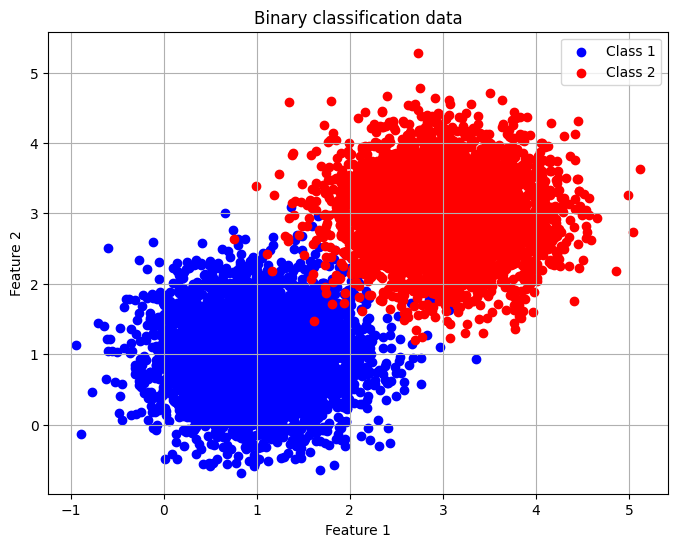

In [ ]:
##################################################
#Generating binary classification data (linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

mean1 = [1,1]
mean2 = [3,3]
cov = [[0.3,0],[0,0.3]]
class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])

class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()


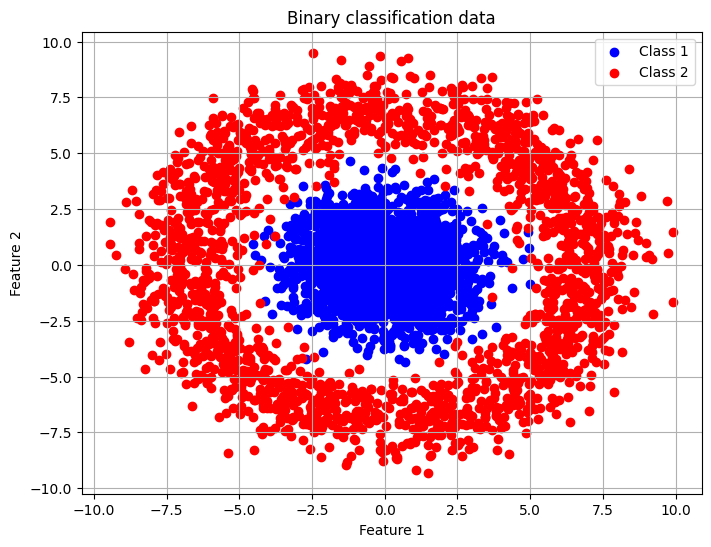

In [ ]:
##################################################
#Generating binary classification data (non-linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

# Function to generate data for concentric circles
def generate_concentric_data(n_samples, radius1,radius2, noise_std):
    # Generate random angles
    angles = np.random.rand(n_samples) * 2 * np.pi
    noise = noise_std*np.random.randn(n_samples)
    # Generate inner and outer circles
    inner_circle = np.array([(radius1 + noise) * np.cos(angles), (radius1 + noise) * np.sin(angles)]).T
    outer_circle = np.array([(radius2 + noise) * np.cos(angles), (radius2 + noise) * np.sin(angles)]).T
    return inner_circle, outer_circle

# Generate data for two classes
n_samples = 2000  # Number of samples for each class
radius1 = 2  # Radius of inner circle
radius2 = 7  # Radius of inner circle
noise_std = 1   # Noise to be added to radius

class1_data, class2_data = generate_concentric_data(n_samples, radius1,radius2,noise_std)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
##################################################
#Classify the linearly separable data using linear classification models
##################################################

def Logistic_Regression(X_train, Y_train, X_test):


  max_iter = 100
  threshold = 0.5

  #Data. Append ones to the training data to take care of the bias
  input=np.array([1])


  # Feature Scaling
  X_train_scaled = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
  X_test_scaled = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)

  # Append ones to the training data to take care of the bias
  X = np.column_stack((np.ones(len(X_train_scaled)), X_train_scaled))
  # Append ones to the test data for bias
  X1= np.column_stack((np.ones(len(X_test_scaled)), X_test_scaled))

  w =np.array([1,1,1])          #Initialize the weight vector

  for iter in range(0,max_iter,1):
    preds = sigmoid(np.dot(X,w))   #Predictions on X. Sigmoid(w^T.x)
    error = preds-Y_train    #Difference between preds and Y_train

    #Compute the gradients and the appropriate learning rate. We can use Hessian matrix as learning rate
    grad=np.dot(X.T,error) + 2 * 0.1* w

    diagonal_elements = np.multiply(preds, (1 - preds)).flatten()
    R = np.diag(diagonal_elements)
    hessian=np.dot(np.dot(X.T,R),X)

    #Update the weight vector
    w=w-np.dot(np.linalg.pinv(hessian),grad)


  #Test data predictions
  test_pred=sigmoid(np.dot(X1,w))



  #Compare the predictions with 0, to output the decision
  test_preds=[]
  for i in range(len(test_pred)):
    if test_pred[i]>threshold:
      test_preds.append(1)
    else:
      test_preds.append(0)

  #Return the predicted test labels
  return test_preds,w








##################################################
#Classify the linearly separable data using deep neural based classification models
##################################################







##################################################
#Compare the performance of both the models on linearly separable data
##################################################










In [ ]:
##################################################
#Classify the non-linearly separable data using linear classification models
##################################################








##################################################
#Classify the non-linearly separable data using deep neural based classification models
##################################################







##################################################
#Compare the performance of both the models on non-linearly separable data
##################################################










<b> Report your observations </b>

1.

2.

3.

